# https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/ML/LogisticRegression/Customer Churn ML/dataset/customer_churn_dataset-training-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [6]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['Usage Frequency'].fillna(df['Usage Frequency'].median(), inplace=True)
df['Support Calls'].fillna(df['Support Calls'].mean(), inplace=True)
df['Payment Delay'].fillna(df['Payment Delay'].median(), inplace=True)
df['Total Spend'].fillna(df['Total Spend'].median(), inplace=True)
df['Last Interaction'].fillna(df['Last Interaction'].median(), inplace=True)
df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    1
Contract Length      1
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
print(df.columns)  # Check before dropping
df = df.drop(columns=['CustomerID', 'Age', 'Gender'], errors='ignore')
print(df.columns)  # Check after dropping

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
Index(['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


In [9]:
print(df.head())  # Check the first few rows
print(df.columns)  # Confirm available columns

   Tenure  Usage Frequency  Support Calls  Payment Delay Subscription Type  \
0    39.0             14.0            5.0           18.0          Standard   
1    49.0              1.0           10.0            8.0             Basic   
2    14.0              4.0            6.0           18.0             Basic   
3    38.0             21.0            7.0            7.0          Standard   
4    32.0             20.0            5.0            8.0             Basic   

  Contract Length  Total Spend  Last Interaction  Churn  
0          Annual        932.0              17.0    1.0  
1         Monthly        557.0               6.0    1.0  
2       Quarterly        185.0               3.0    1.0  
3         Monthly        396.0              29.0    1.0  
4         Monthly        617.0              20.0    1.0  
Index(['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='o

In [10]:
print(df.columns)

Index(['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


In [11]:
X = df.drop(columns=['Churn'])
Y = df['Churn']

In [12]:
label_encoder = LabelEncoder()
df['Subscription Type'] = label_encoder.fit_transform(df['Subscription Type'])
df['Contract Length'] = label_encoder.fit_transform(df['Contract Length'])
df['Subscription Type'] = label_encoder.fit_transform(df['Subscription Type'])

In [13]:
df.head()

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [14]:
X = df.drop(columns=['Churn'])
Y = df['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_train_pred = model.predict(X_train)

training_score = accuracy_score(y_train, y_train_pred)
print(training_score)

0.8410025349764366


In [19]:
y_test_pred = model.predict(X_test)

testing_score = accuracy_score(y_test, y_test_pred)
print(testing_score)

0.841868272709744


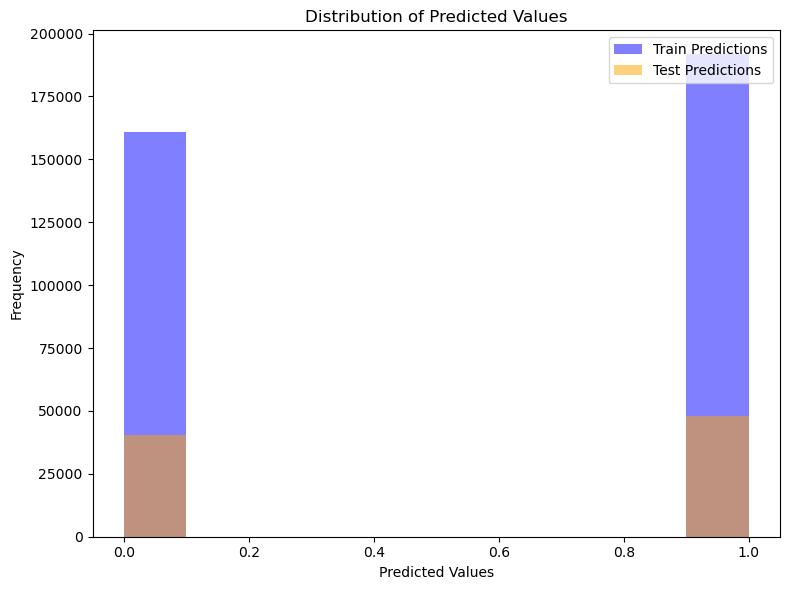

In [20]:
# Plot distribution of predicted values for training and test sets
plt.figure(figsize=(8, 6))

plt.hist(y_train_pred, bins=10, alpha=0.5, label="Train Predictions", color='blue')
plt.hist(y_test_pred, bins=10, alpha=0.5, label="Test Predictions", color='orange')

plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()